# Assignment 1

Matrikelnr.: 2089929

## Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

## Überblick und Vorbereitung der Daten

### Import

In [64]:
df_stroke_data = pd.read_csv('01_Classification_stroke_data.csv')

In [65]:
df_stroke_data.head(500)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,34299,Female,71.0,0,0,Yes,Private,Urban,93.28,34.7,never smoked,0
496,54375,Male,5.0,0,0,No,children,Rural,122.19,35.0,Unknown,0
497,37832,Female,14.0,0,0,No,children,Rural,129.53,21.3,never smoked,0
498,21058,Female,15.0,0,0,No,children,Rural,114.53,29.1,Unknown,0


Mit der `head()` Funktion sehen wir:
- Es handelt sich scheinbar um Patientendaten. 
- Die Felder bestehen aus verschiedenen Datentypen, u.a. Zahlenwerte (sowohl ganz als auch rational), Zeichenketten.  
- Die Felder `hypertension`, `heart_disease`, `ever_married` und `stroke` scheinen nur aus booleschen Werten zu bestehen (1 und 0 bzw. yes und no). 

In [66]:
df_stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Die `describe()` Methode gibt weitere Einblicke in die Daten:
- Alle Spalten haben 5110 Einträge, außer BMI, die 4909 nicht-fehlende Werte hat.
- Das durchschnittliche Alter der Personen im Datensatz beträgt etwa 43,23 Jahre. Die Standardabweichung beträgt hier etwa 22,61. Die jüngste Person ist 0,08 Jahre alt, die älteste 82 Jahre. 25% der Personen im Datensatz sind 25 Jahre alt oder jünger. Der Median des Alters beträgt 45 Jahre. 75% der Personen im Datensatz sind 61 Jahre oder jünger.
- Etwa 5% der Personen im Datensatz haben eine Herzerkrankung. 
- Circa 9,7% der Patienten leiden unter Bluthochdruck.  
- Etwa 65% aller Patienten waren oder sind verheiratet.
- Etwa 4,8% der Patienten hatten einen Schlaganfall.

Jetzt verschaffen wir uns noch einen Überblick über die Spalten, in denen Zeichenketten stehen.

In [67]:
df_stroke_data['gender'].value_counts(normalize=True) * 100

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

Etwa 58% der Patienten sind weiblich, etwa 41% männlich.

In [68]:
df_stroke_data['smoking_status'].value_counts(normalize=True) * 100

smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64

Circa 37% der Patienten haben nie geraucht, 15% sind raucher und 17% haben mit dem Rauchen aufgehört. Bei 30% ist nicht bekannt, ob sie jemals geraucht haben oder rauchen. 

In [69]:
df_stroke_data['work_type'].value_counts(normalize=True) * 100

work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64

Der Großteil aller Personen im Datensatz ist "Privat" beschäftigt, also wahrscheinlich in einem Angestelltenverhältnis.

In [70]:
df_stroke_data['Residence_type'].value_counts(normalize=True) * 100

Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64

Das Verhältnis zwischen Land- und Stadtbewohnern ist recht gleichmäßig, es beträgt nahezu 50%.

### Nullwerte
Zuletzt entfernen wir noch Nullwerte aus den Daten.

In [71]:
df_stroke_data = df_stroke_data.dropna()

### Encoding

In [72]:
df_stroke_data['ever_married'] = df_stroke_data['ever_married'].replace({'Yes': 1, 'No': 0})
df_stroke_data['gender'] = df_stroke_data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
df_stroke_data['Residence_type'] = df_stroke_data['Residence_type'].replace({'Rural': 0, 'Urban': 1})
df_stroke_data['smoking_status'] = df_stroke_data['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})
df_stroke_data['work_type'] = df_stroke_data['work_type'].replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})

### Trainings- und Testdatensplit
Nun splitte ich den Datensatz in Trainings- und Testdaten. Der Anteil an Testdaten entspricht 30%.

In [73]:
# Aufteilen in Features und Labels
x = df_stroke_data[['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]  # Features
y = df_stroke_data.stroke # Label

# Split in Test- und Trainingsdaten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Prüfung von Ungleichgewichten

In [74]:
print(y_train.value_counts())

stroke
0    3299
1     137
Name: count, dtype: int64


Wir sehen ein Ungleichgewicht zwischen Patienten mit Schlaganfall und ohne. Um dies auszugleichen, wende ich die over-sampling Methode SMOTE (Synthetic Minority Over-sampling Technique) an, um die Azahl der Klassen, die sich in der Minderheit befinden, zu erhöhen. Hierfür nutze ich das Package `over_sampling` von imbalanced-learn.

In [75]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
print(y_train.value_counts())

stroke
0    3299
1    3299
Name: count, dtype: int64


## Aufgabe 1
Apply three different simple machine learning models, which we discussed in lecture 02. Describe your approach, interpret the performance, and justify (based on the results) which machine learning model you would choose.

### Decision Tree
Als erstes Modell habe ich den Entscheidungsbaum gewählt.

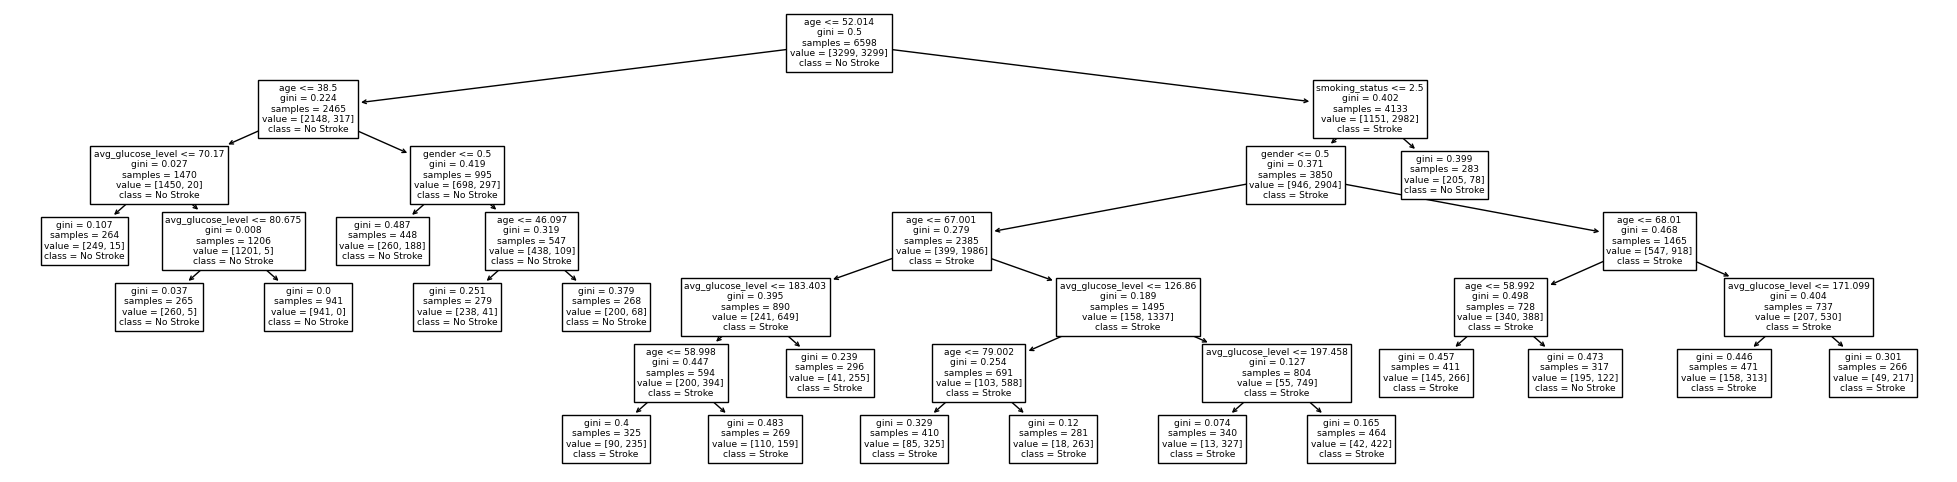

In [76]:
# Erstellen des Entscheidungsbaums mit den Trainingsdaten
tree = DecisionTreeClassifier(random_state=42, min_samples_leaf=0.04)
tree = tree.fit(x_train, y_train)

# Vorhersage auf den Testdaten und Bewertung der Genauigkeit
y_pred = tree.predict(x_test)

#Visualisierung des Entscheidungsbaums
fig, ax = plt.subplots(figsize=(25, 6))
plot_tree(tree, feature_names=x.columns.tolist(), ax=ax, class_names=['No Stroke', 'Stroke'])
plt.show()

In [77]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7603530210454854
Precision:  0.13506493506493505
Recall:  0.7222222222222222
F1-Score:  0.2275711159737418


Die Genauigkeit (Accuracy) des Modells liegt bei 95,11%, was auf den ersten Blick als eine sehr hohe Rate erscheinen mag. Jedoch deuten eine Präzision (Precision), ein Rückruf (Recall) und ein F1-Score von jeweils 0,0 darauf hin, dass das Modell keine einzige positive Klasse korrekt vorhergesagt hat. Dies könnte darauf hinweisen, dass das Modell overfittet. Das heißt, das Modell ist möglicherweise zu stark auf die Muster in den Trainingsdaten abgestimmt und verallgemeinert nicht gut auf unbekannte Daten. Dieses Phänomen ist besonders wahrscheinlich, wenn die Trainingsdaten unausgewogen sind, also eine Klasse überproportional vertreten ist. 

### Naive Bayes Model
Als zweites Modell wende ich das Naive Bayes Model an.

In [78]:
# Gaussian Classifier
churn_gbn = GaussianNB()

# Training des Models auf dem Trainingsdatensatz
churn_gbn.fit(x_train, y_train)

# Prediction auf den Trainingsdaten
y_pred_train_gbn = churn_gbn.predict(x_train)

# Prediction auf den Testdaten
y_pred_test_gbn = churn_gbn.predict(x_test)

#### Evaluierung

In [79]:
print("Accuracy: ", accuracy_score(y_test, y_pred_test_gbn))
print("Precision: ", precision_score(y_test, y_pred_test_gbn))
print("Recall: ", recall_score(y_test, y_pred_test_gbn))
print("F1-Score: ", f1_score(y_test, y_pred_test_gbn))

Accuracy:  0.7223353699932111
Precision:  0.12472160356347439
Recall:  0.7777777777777778
F1-Score:  0.21497120921305182


Die Genauigkeit (Accuracy) des Modells beträgt 88,12%. Die Präzision (Precision) liegt bei 18,79%, was bedeutet, dass von allen Fällen, die das Modell als positiv klassifiziert hat, etwa 18,79% tatsächlich positiv waren. Der Rückruf (Recall) ist mit 43,06% deutlich höher, was zeigt, dass das Modell in der Lage ist, fast die Hälfte der tatsächlich positiven Fälle korrekt zu identifizieren. Der F1-Score, der ein harmonisches Mittel von Präzision und Rückruf ist, liegt bei 26,16%.

### Logistische Regression
Als drittes Modell wende ich die logistische Regression an.

In [80]:
# Initialisierung des Modells
logreg = LogisticRegression(max_iter=500)

# Training des Modells auf den Trainingsdaten
logreg.fit(x_train, y_train)

# Prediction auf den Testdaten
y_pred_test_logreg = logreg.predict(x_test)

In [81]:
print("Accuracy: ", accuracy_score(y_test, y_pred_test_logreg))
print("Precision: ", precision_score(y_test, y_pred_test_logreg))
print("Recall: ", recall_score(y_test, y_pred_test_logreg))
print("F1-Score: ", f1_score(y_test, y_pred_test_logreg))

Accuracy:  0.7494908350305499
Precision:  0.12020460358056266
Recall:  0.6527777777777778
F1-Score:  0.20302375809935208
